In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [3]:
tf.random.set_seed(888)

# 1. 資料準備

In [4]:
from tensorflow.keras.datasets import cifar10 

In [5]:
(x_img_train,y_label_train),\
(x_img_test,y_label_test)=cifar10.load_data() 

170508288/170498071 [==============================] - 13s 0us/step


In [6]:
y_label_train=y_label_train.reshape(-1)
y_label_test=y_label_test.reshape(-1)

In [7]:
print("train data:",'images:',x_img_train.shape,"labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ," labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3) labels: (50000,)
test  data: images: (10000, 32, 32, 3)  labels: (10000,)


In [8]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [9]:
augment_img_ID=16

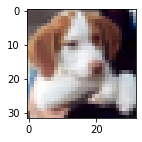

In [10]:
import matplotlib.pyplot as plt
fig = plt.gcf().set_size_inches(2, 2)
plt.imshow(x_img_test_normalize[augment_img_ID])

In [11]:
x_img_test_normalize[augment_img_ID].shape

(32, 32, 3)

In [12]:
x_img = tf.expand_dims(x_img_test_normalize[augment_img_ID], axis=0)
x_img.shape 

TensorShape([1, 32, 32, 3])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=30) 

In [14]:
batch=datagen.flow(x_img,batch_size=10)

In [15]:
batch[0].shape

(1, 32, 32, 3)

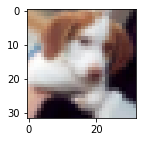

In [16]:
fig = plt.gcf().set_size_inches(2, 2)
for batch in datagen.flow(x_img, batch_size=1 ):
    plt.imshow(batch[0])
    break  

In [17]:
def display_ImageDataGenerator(datagen,x_img):
  fig = plt.gcf().set_size_inches(10, 10)
  i=1
  for batch in datagen.flow(x_img,batch_size=1):
    ax=plt.subplot(5,5,i)
    ax.imshow(batch[0])
    i += 1
    if i > 10: break  
  plt.show()  

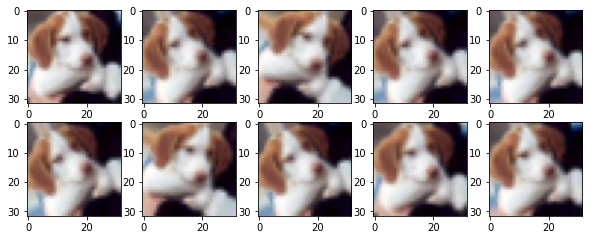

In [18]:
datagen = ImageDataGenerator(rotation_range=30)
display_ImageDataGenerator(datagen,x_img)

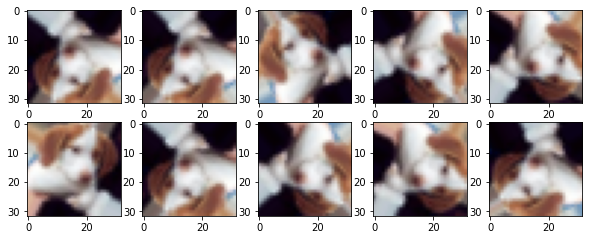

In [19]:
datagen = ImageDataGenerator(rotation_range=180)
display_ImageDataGenerator(datagen,x_img)

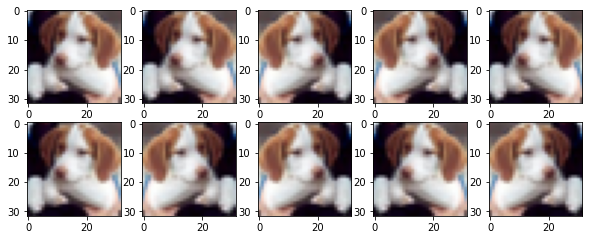

In [20]:
datagen = ImageDataGenerator(horizontal_flip=True)
display_ImageDataGenerator(datagen,x_img)

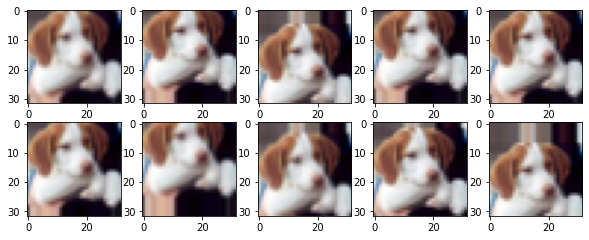

In [21]:
datagen = ImageDataGenerator(height_shift_range=0.2)
display_ImageDataGenerator(datagen,x_img)

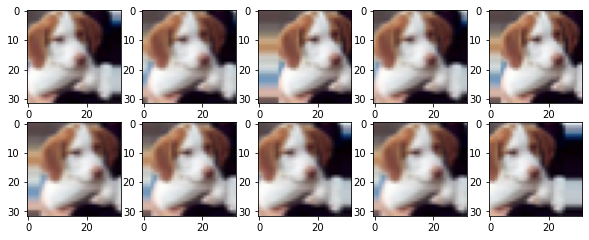

In [22]:
datagen = ImageDataGenerator(width_shift_range=0.2)
display_ImageDataGenerator(datagen,x_img)

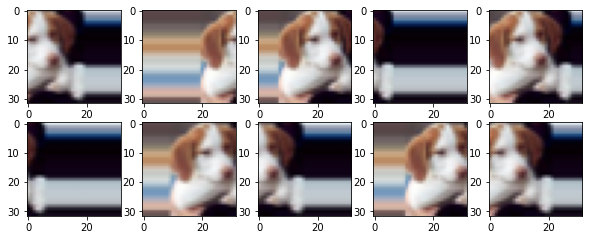

In [23]:
datagen = ImageDataGenerator(width_shift_range=0.9)
display_ImageDataGenerator(datagen,x_img)

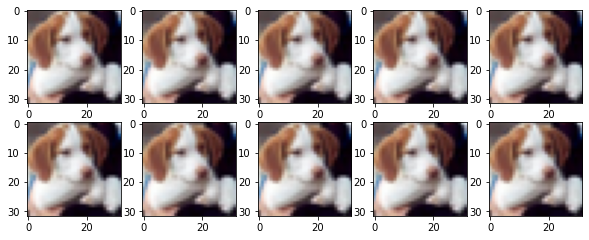

In [24]:
datagen = ImageDataGenerator(shear_range=0.2)
display_ImageDataGenerator(datagen,x_img)

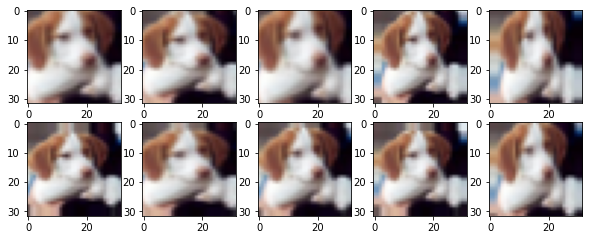

In [25]:
datagen = ImageDataGenerator(zoom_range=0.2)
display_ImageDataGenerator(datagen,x_img)

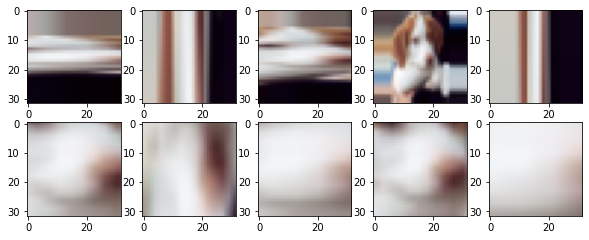

In [26]:
datagen = ImageDataGenerator(zoom_range=1.2)
display_ImageDataGenerator(datagen,x_img)

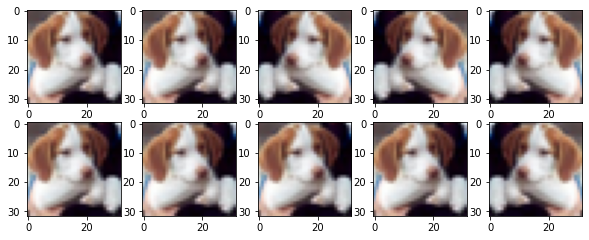

In [27]:
datagen = ImageDataGenerator(horizontal_flip=True)
display_ImageDataGenerator(datagen,x_img)

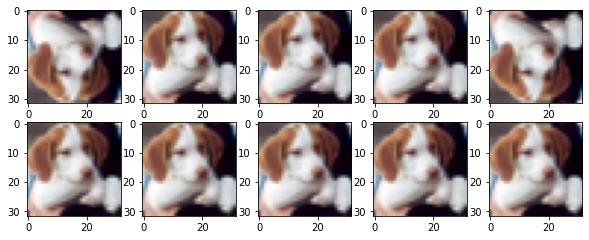

In [28]:
datagen = ImageDataGenerator(vertical_flip=True)
display_ImageDataGenerator(datagen,x_img)

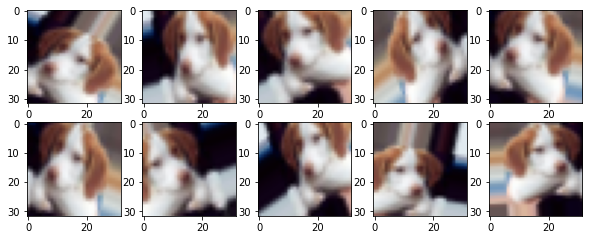

In [29]:
datagen = ImageDataGenerator(
  rotation_range=30, horizontal_flip=True,
  width_shift_range=0.2,height_shift_range=0.2,
  zoom_range=0.2)
display_ImageDataGenerator(datagen,x_img) 

#display train img augment

In [30]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
      5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [31]:
import matplotlib.pyplot as plt
import numpy as np 

In [32]:
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx])
        title= str(idx)+',' +label_dict[labels[idx]]
        if len(prediction)>0:
            title+="=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

In [33]:
datagen = ImageDataGenerator(
  rotation_range=30, horizontal_flip=True,
  width_shift_range=0.2,height_shift_range=0.2,
  zoom_range=0.2)

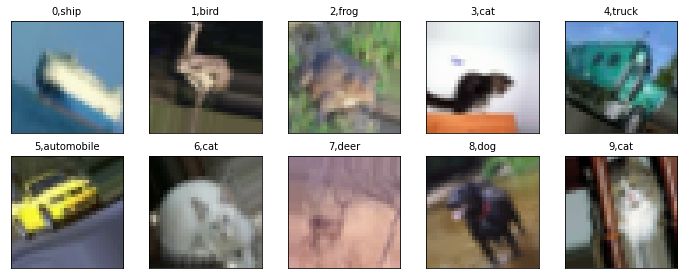

In [34]:
for x_batch,y_batch in datagen.flow(x_img_train,y_label_train,batch_size=10):
    plot_images_labels_prediction(x_batch.astype(np.uint8), y_batch,[],0,10)
    break;    

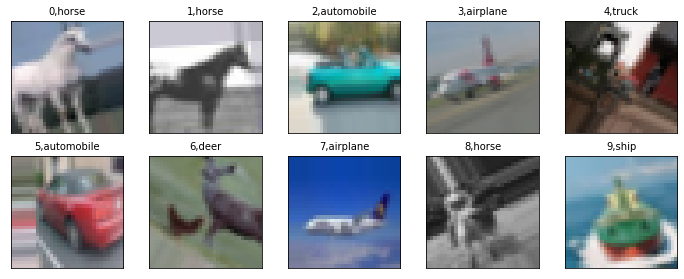

In [35]:
for x_batch,y_batch in datagen.flow(x_img_train,y_label_train,batch_size=10):
    plot_images_labels_prediction(x_batch.astype(np.uint8), y_batch,[],0,10)
    break;    